# Chapter.5 Multi-variate Linear Regression

## Programming Assignment.5-04 MVLR for One Sample
MVLR을 학습시키는데 앞에 있는 PA와 달리 basic building node를 이용하여 학습합니다
model은
$$\hat{y} =\theta_{2}x_{2} + \theta_{1}x_{1} + \theta_{0}$$

이고, loss는 square error를 사용하기 때문에
$$\mathcal{L} = (y - \hat{y})^{2}$$
가 됩니다.  



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import basic_nodes as nodes 

import os
import sys
utils_path = os.path.dirname(os.path.abspath(__name__)) + '/../utils/'
if utils_path not in sys.path:    
    sys.path.append(utils_path)

from LR_dataset_generator import LR_dataset_generator

plt.style.use('seaborn')
np.random.seed(0)

다음은 dataset이
$$y = 4x_{2} + 3x_{1}  - 1$$
에서부터 만들어지고, $x_{2}$,$x_{1}$는 standard normal distribution에서부터 만들어지는 코드입니다.


In [2]:

coefficient_list = [-1, 3, 4]

data_gen = LR_dataset_generator(feature_dim = 2, n_sample = 150)
data_gen.set_coefficient(coefficient_list)
distribution_params = {0:{'mean':0, 'std':1},
                       1:{'mean':0, 'std':1}
                      }
data_gen.set_distribution_params(distribution_params)
x_data, y_data = data_gen.make_dataset()



학습에 필요한 model과 loss function을 basic building node들을 이용하여 구현합니다.  
강의에서 사용된 model과 loss는 다음과 같습니다.
<img src='./imgs/5_4_1.jpg' width = 600>

따라서 model을 implementation하기 위해선 mul_node, plus_node가 필요하고,  
loss를 implementation하기 위해선 minus_node와 square_node가 필요합니다.

node1에는 mul_node 배열을<br>
node2에는 plus_node 배열을<br>
node3에는 minus_node<br>
node4에는 square_node를 구현합니다

In [3]:
feature_dim = 2
node1 = [None] + [nodes.mul_node() for _ in range(feature_dim)]
node2 = [None] + [nodes.plus_node() for _ in range(feature_dim)]
node3 = nodes.minus_node()
node4 = nodes.square_node()


# Learning
th_list = [0.1, 0.1, 0.1]

lr = 0.01
epochs = 3
th_accum = np.array(th_list).reshape(-1, 1)


loss_list = []

for epoch in range(epochs):
    for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
        
        z1_1 = node1[1].forward(th_list[1], X[1])
        z1_2 = node1[2].forward(th_list[2], X[2])
        
        
        z2_1 = node2[1].forward(th_list[0], z1_1)
        z2_2 = node2[2].forward(z2_1, z1_2)
        
        z3 = node3.forward(y, z2_2)
        loss = node4.forward(z3)
        
        dz3 = node4.backward(1)
        dy, dz2_2 = node3.backward(dz3)
        
        dz2_1, dz1_2 = node2[2].backward(dz2_2)
        dth0, dz1_1 = node2[1].backward(dz2_1)
        
    
        dth2, dx2 = node1[2].backward(dz1_2)
        dth1, dx1 = node1[1].backward(dz1_1)
        
        th_list[2] = th_list[2] - lr * dth2
        th_list[1] = th_list[1] - lr * dth1
        th_list[0] = th_list[0] - lr * dth0
        
        th_current = np.array(th_list).reshape(-1, 1)
        th_accum = np.hstack((th_accum, th_current))
        loss_list.append(loss)

Text(0.5, 1.0, 'Loss')

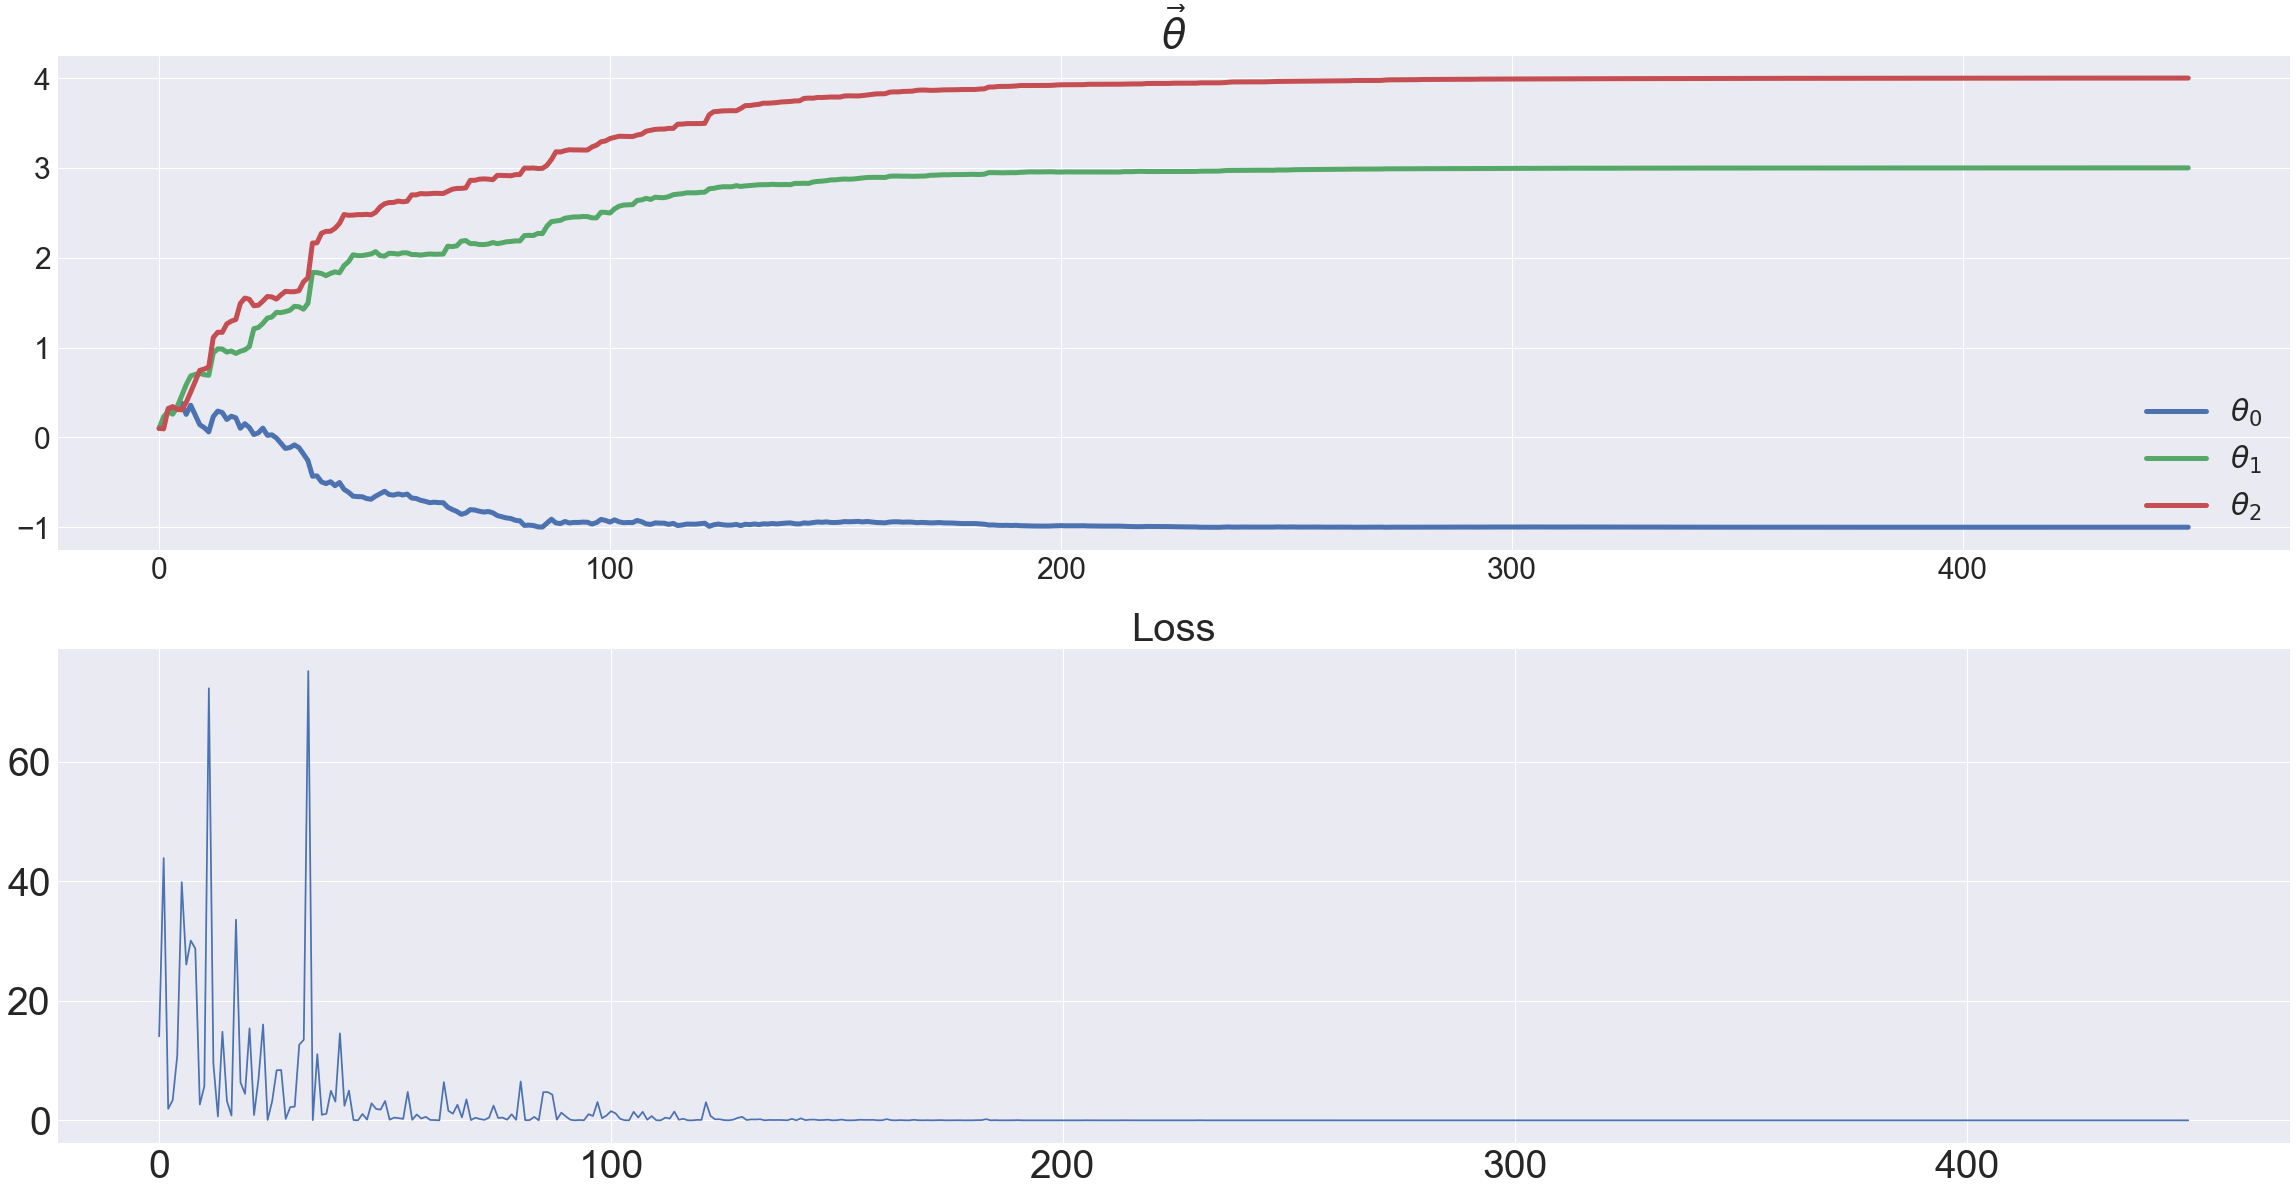

In [4]:
fig, ax = plt.subplots(2, 1, figsize = (40,20))
for i in range(feature_dim + 1):
    ax[0].plot(th_accum[i], label = r'$\theta_{%d}$'%i,
              linewidth = 5)
ax[1].plot(loss_list)
ax[0].legend(loc = 'lower right', fontsize = 30)
ax[0].tick_params(axis = 'both', labelsize = 30)
ax[1].tick_params(axis = 'both', labelsize = 39)

ax[0].set_title(r'$\vec{\theta}$', fontsize = 40)
ax[1].set_title('Loss', fontsize = 40)